### import R packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from rpy2.robjects.packages import importr
from plotnine import *

Unable to determine R home: [WinError 2] 系统找不到指定的文件。
Unable to determine R library path: Command '('D:\\RStudio\\R\\R-4.1.3\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.


In [2]:
# import R's "base" package
base = importr('base')

# import R's "utils" package
utils = importr('utils')

In [3]:
df = pd.read_csv("311_012322_013022.csv")
df['hour24'] = pd.to_datetime(df['Created Date']).dt.hour
df.head()

C:\Users\1\AppData\Local\Temp/ipykernel_17448/488699377.py:1: DtypeWarning: Columns (18,20,31,32) have mixed types. Specify dtype option on import or set low_memory=False.


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,hour24
0,53143004,01/23/2022 12:00:05 AM,01/23/2022 12:27:46 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10022.0,988 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.756322,-73.967457,"(40.75632239442286, -73.96745673452742)",0
1,53140252,01/23/2022 12:00:08 AM,01/23/2022 01:30:04 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10467.0,631 EAST 220 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.884867,-73.864230,"(40.88486733069578, -73.86423003373268)",0
2,53139434,01/23/2022 12:00:15 AM,01/23/2022 12:13:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10457.0,255 EAST BURNSIDE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.851583,-73.902473,"(40.851582614542984, -73.90247254726691)",0
3,53143616,01/23/2022 12:00:28 AM,01/23/2022 12:23:13 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11373.0,52-20 92 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.739185,-73.871134,"(40.73918530220479, -73.87113420208536)",0
4,53137450,01/23/2022 12:00:41 AM,01/23/2022 12:46:54 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11213.0,952 SAINT MARKS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.674602,-73.939150,"(40.67460212304119, -73.93914987316077)",0


C:\Users\1\AppData\Local\Temp/ipykernel_17448/2093137466.py:1: DtypeWarning: Columns (18,20,31,32) have mixed types. Specify dtype option on import or set low_memory=False.


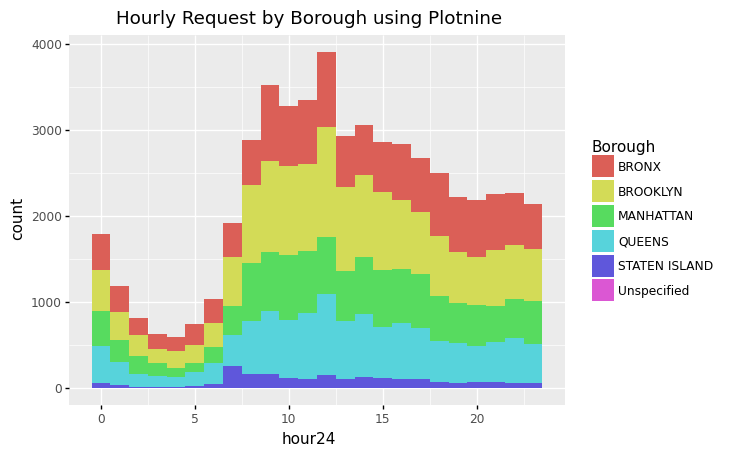

<ggplot: (111182677387)>

In [4]:
df = pd.read_csv("311_012322_013022.csv")
df['hour24'] = pd.to_datetime(df['Created Date']).dt.hour
(
    ggplot(df, aes(x = 'hour24', y = after_stat('count'),fill='Borough'))
    + geom_histogram(binwidth = 1, bins = 24)
    + ggtitle("Hourly Request by Borough using Plotnine")
)

In [8]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter
import rpy2.robjects as robjects
from rpy2.robjects.lib import grdevices
from rpy2.robjects.vectors import IntVector
from IPython.display import Image,display

In [9]:
df2=df[['Borough','hour24']]
df2.head()
with localconverter(ro.default_converter + pandas2ri.converter):
  df2_r = ro.conversion.py2rpy(df2)

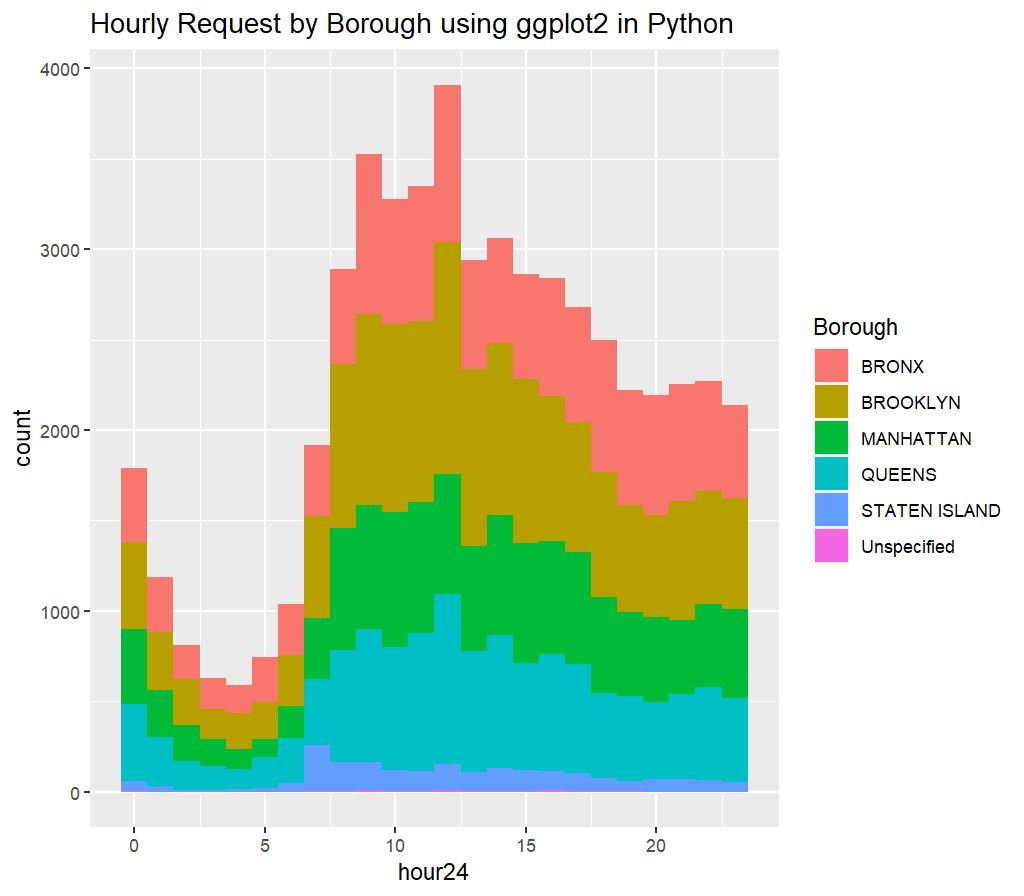

In [11]:
graphics = robjects.packages.importr('graphics')
import rpy2.robjects.lib.ggplot2 as ggplot2
with grdevices.render_to_bytesio(grdevices.jpeg,width=1024,height=896,res=150) as img:
    gp = ggplot2.ggplot(df2_r)
    pp = (
        gp
        +ggplot2.aes_string(x='hour24',fill='Borough')
        +ggplot2.geom_histogram(binwidth = 1, bins = 24)
        +ggplot2.ggtitle("Hourly Request by Borough using ggplot2 in Python")
    )
    
    pp.plot()

display(Image(data=img.getvalue(),format='jpeg',embed=True))